In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp
%matplotlib inline


## **EDA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/house price.csv')

In [4]:
df.head(2)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [5]:
#df['area']=(df['X5 latitude'].values)*(df['X6 longitude'].values)
#df.drop(['area'],axis=1,inplace=True)
#df['X1 transaction date']=pd.to_datetime(df['X1 transaction date'])
#df['year']= df['X1 transaction date'].dt.year
#print(df['year'].unique())
df['X1 transaction date']=df['X1 transaction date'].astype(int)
df.drop(df.iloc[:,8:14],axis=1,inplace=True)
#df.drop(['year'	,'age>40',	'age>30',	'age>20',	'age>10'],axis=1,inplace=True)
df.head()
#Q

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
df.shape

(414, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    int64  
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 26.0 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2012.695652,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.460687,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.000000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.000000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.000000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.000000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.000000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [10]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,0.007379,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,0.007379,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
X2 house age,-0.032808,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
df.head(1)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9


In [12]:
df['X1 transaction date'].unique()
#data take across two years (2012 and 2013)

array([2012, 2013])

In [13]:
#function to get loc of house
#from geopy.geocoders import Nominatim
#for w,z in zip(df['X5 latitude'],df['X6 longitude']):
 #   geolocator = Nominatim(user_agent="specify_your_app_name_here")
  #  location = geolocator.reverse("52.509669, 13.376294")

#print(location.address)
  
# this transaction is in germany





In [14]:
df['age>40']=df['X2 house age'].values>40
df['age>30']=df['X2 house age'].values>30
df['age>20']=df['X2 house age'].values>20
df['age>10']=df['X2 house age'].values>10

print(df['age>40'].sum())
print(df['age>30'].sum())
print(df['age>20'].sum())
print(df['age>10'].sum())


8
94
137
304


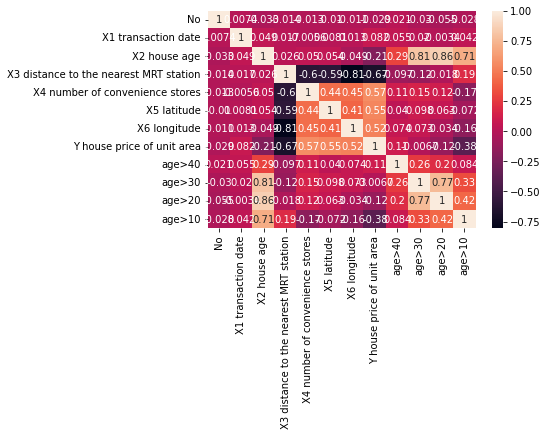

In [16]:
sns.heatmap(df.corr(),annot=True)


[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Barplot for year transaction')]

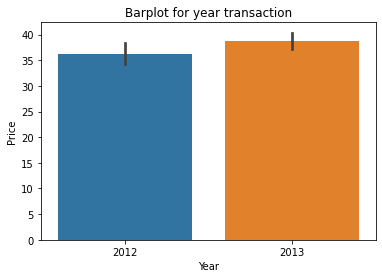

In [17]:
sns.barplot(data=df,x='X1 transaction date',y='Y house price of unit area').set(xlabel='Year',ylabel='Price',title='Barplot for year transaction')
#prices ar higher in 2013

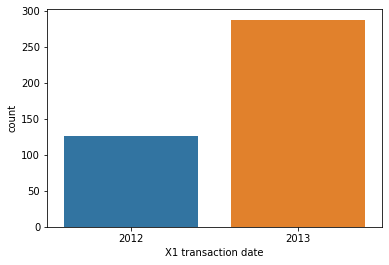

In [18]:
sns.countplot(data=df,x='X1 transaction date')
#more transaction in 2013

[Text(0.5, 1.0, 'Histplot')]

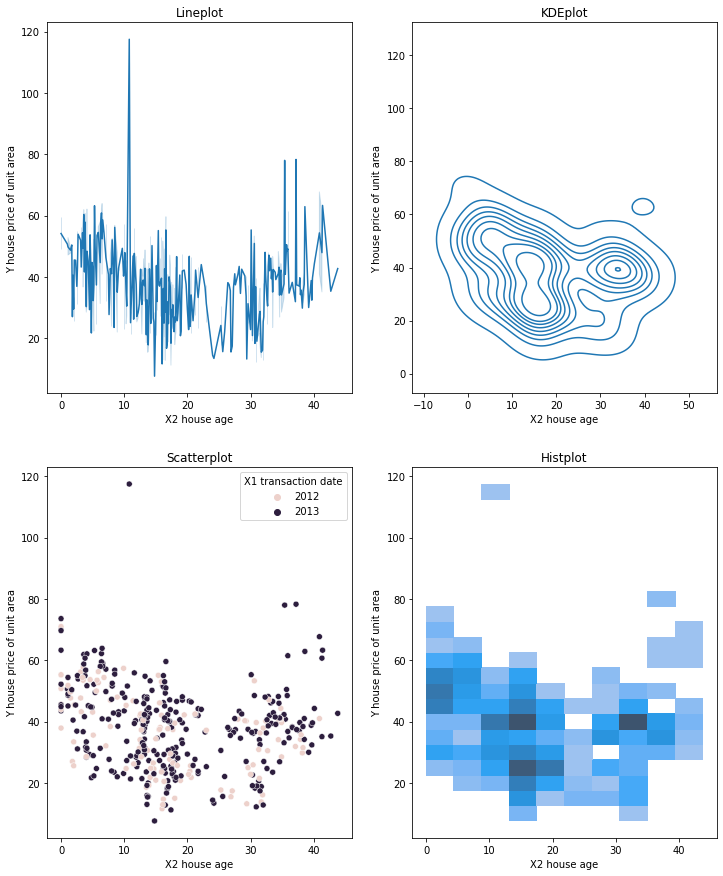

In [19]:
#relation bet. age and price
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.lineplot(data=df,x='X2 house age',y='Y house price of unit area',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X2 house age',y='Y house price of unit area',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X2 house age',y='Y house price of unit area',ax=axes[1,0],hue='X1 transaction date').set(title="Scatterplot")
sns.histplot(data=df,x='X2 house age',y='Y house price of unit area',ax=axes[1,1]).set(title="Histplot")
#age is nearly inverse with price

[Text(0.5, 1.0, 'Histplot')]

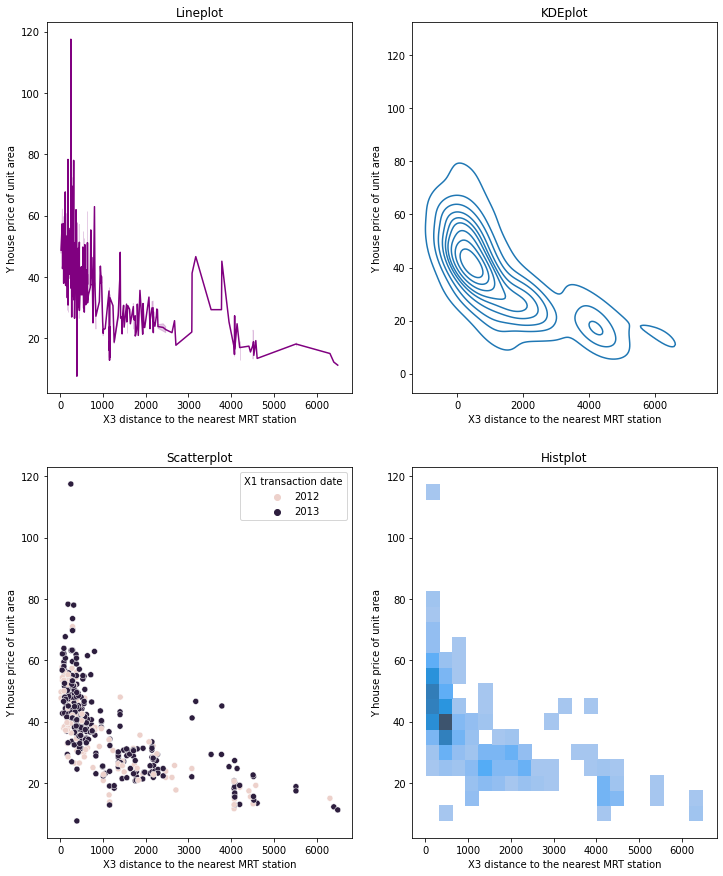

In [60]:
#relation bet. distance to nearst mrt station and price
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.lineplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area',color='purple',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area',hue='X1 transaction date',ax=axes[1,0]).set(title="Scatterplot")
sns.histplot(data=df,x='X3 distance to the nearest MRT station',y='Y house price of unit area',ax=axes[1,1]).set(title="Histplot")
#distance to nearst station is nearly inverse with price

In [84]:
#df['Y house price of unit area']>100).unique
#df['No'].unique(['Y house price of unit area']>100)

[Text(0.5, 1.0, 'Histplot')]

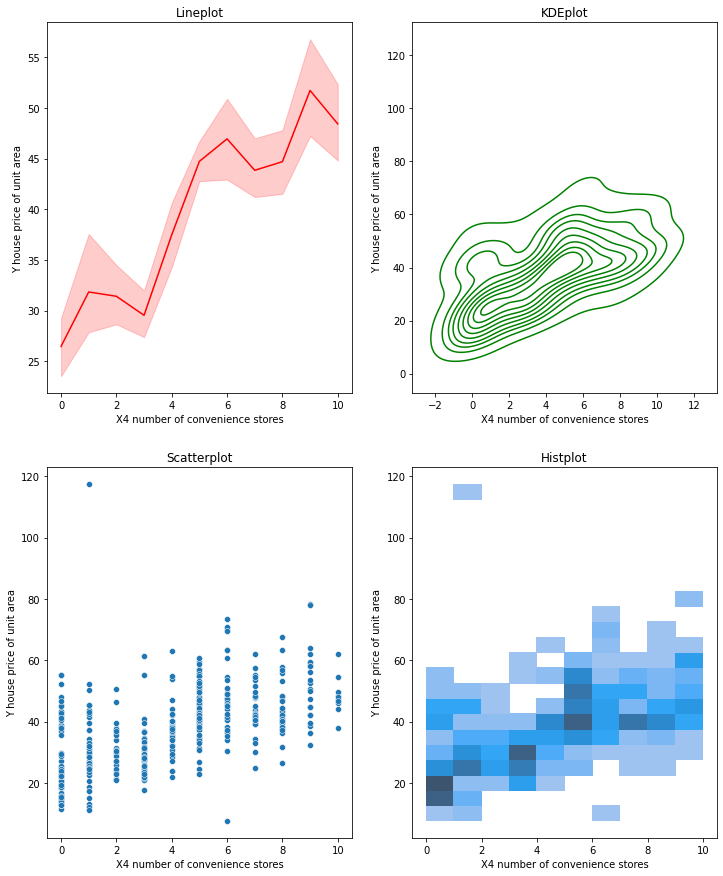

In [21]:
#relation bet. number of stores and price
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.lineplot(data=df,x='X4 number of convenience stores',y='Y house price of unit area',color='r',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X4 number of convenience stores',y='Y house price of unit area',color='g',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X4 number of convenience stores',y='Y house price of unit area',ax=axes[1,0]).set(title="Scatterplot")
sns.histplot(data=df,x='X4 number of convenience stores',y='Y house price of unit area',ax=axes[1,1]).set(title="Histplot")
#price is directly prop with no. of stores

[Text(0.5, 1.0, 'Histplot')]

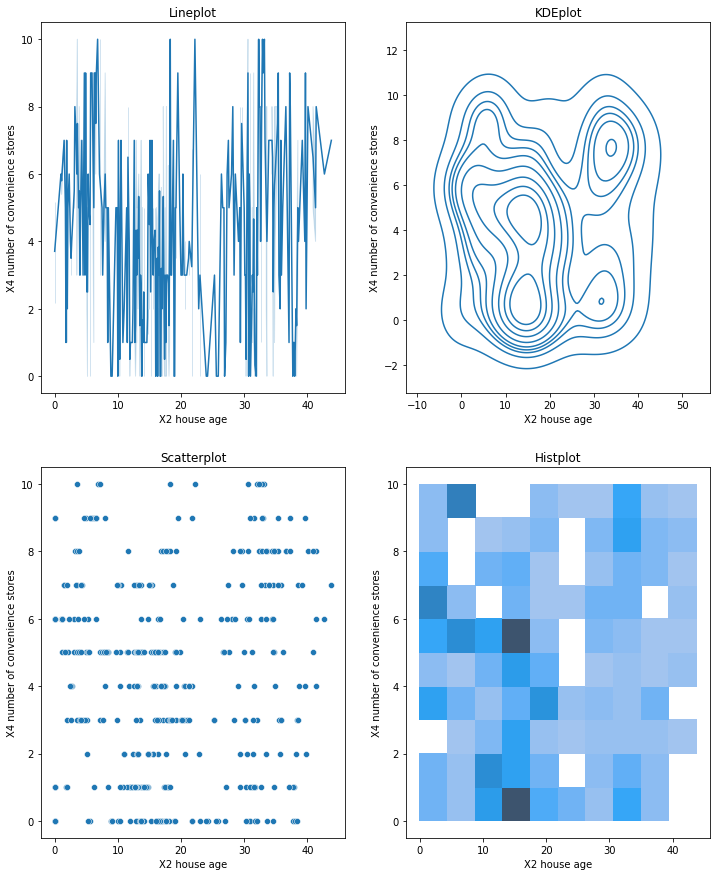

In [22]:
#relation bet. age and number of stores
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.lineplot(data=df,x='X2 house age',y='X4 number of convenience stores',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X2 house age',y='X4 number of convenience stores',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X2 house age',y='X4 number of convenience stores',ax=axes[1,0]).set(title="Scatterplot")
sns.histplot(data=df,x='X2 house age',y='X4 number of convenience stores',ax=axes[1,1]).set(title="Histplot")
#no rlation between age and number of stores
#Q textf

[Text(0.5, 1.0, 'Histplot')]

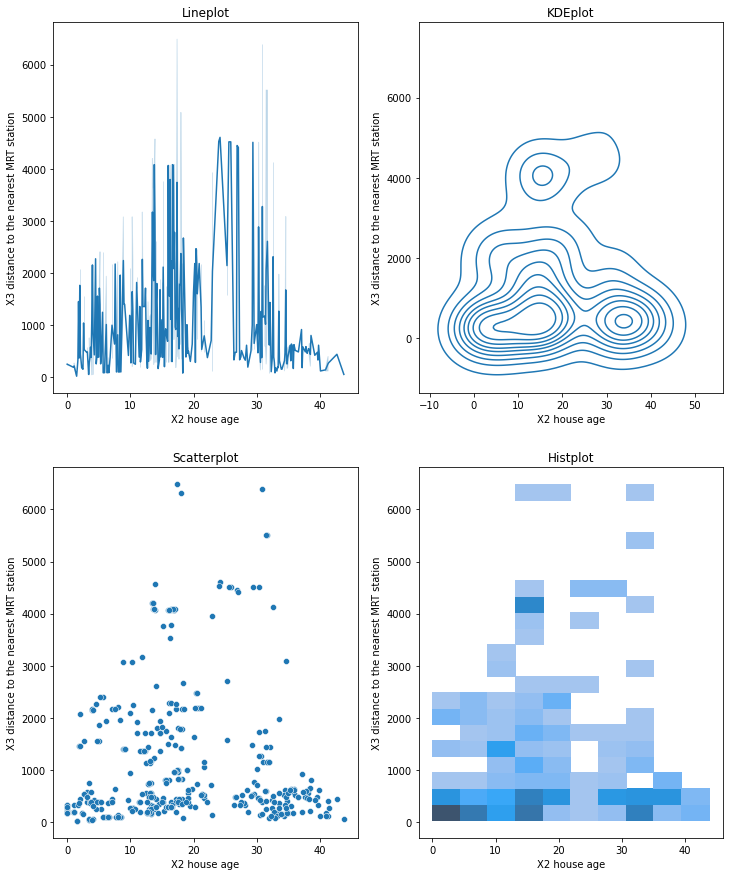

In [23]:
#relation bet. age and distance to nearst mrt station
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.lineplot(data=df,x='X2 house age',y='X3 distance to the nearest MRT station',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X2 house age',y='X3 distance to the nearest MRT station',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X2 house age',y='X3 distance to the nearest MRT station',ax=axes[1,0]).set(title="Scatterplot")
sns.histplot(data=df,x='X2 house age',y='X3 distance to the nearest MRT station',ax=axes[1,1]).set(title="Histplot")
#no rlation between age and distance

[Text(0.5, 1.0, 'Histplot')]

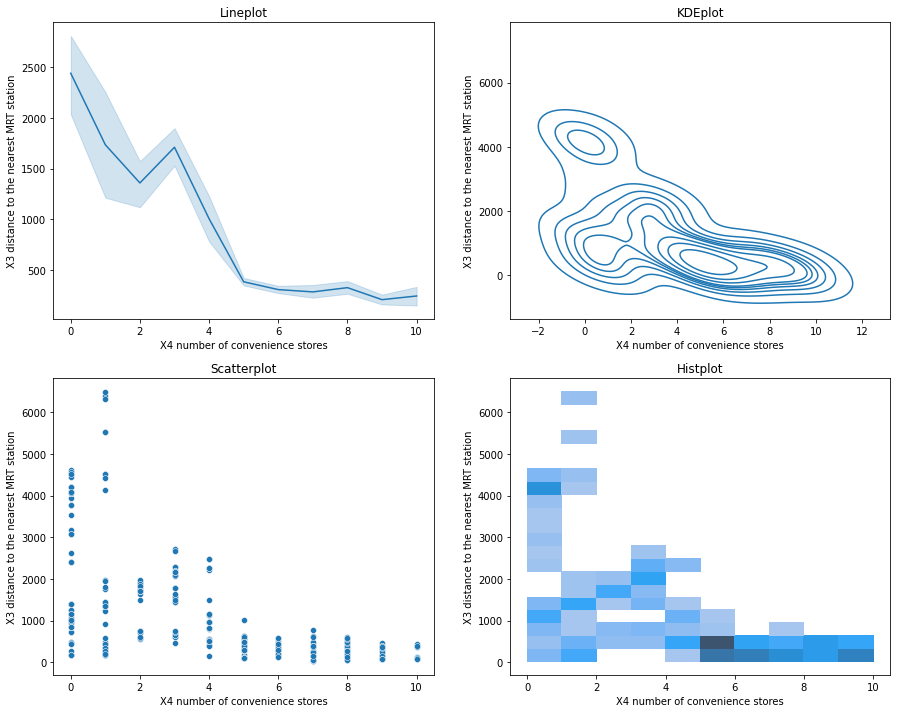

In [24]:
#relation bet. age and distance to nearst mrt station
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.lineplot(data=df,x='X4 number of convenience stores',y='X3 distance to the nearest MRT station',ax=axes[0,0]).set(title="Lineplot")
sns.kdeplot(data=df,x='X4 number of convenience stores',y='X3 distance to the nearest MRT station',ax=axes[0,1]).set(title="KDEplot")
sns.scatterplot(data=df,x='X4 number of convenience stores',y='X3 distance to the nearest MRT station',ax=axes[1,0]).set(title="Scatterplot")
sns.histplot(data=df,x='X4 number of convenience stores',y='X3 distance to the nearest MRT station',ax=axes[1,1]).set(title="Histplot")
#number of stores increases towards th mrt station

In [25]:
df.head(1)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,age>40,age>30,age>20,age>10
0,1,2012,32.0,84.87882,10,24.98298,121.54024,37.9,False,True,True,True


[Text(0.5, 1.0, 'Prices')]

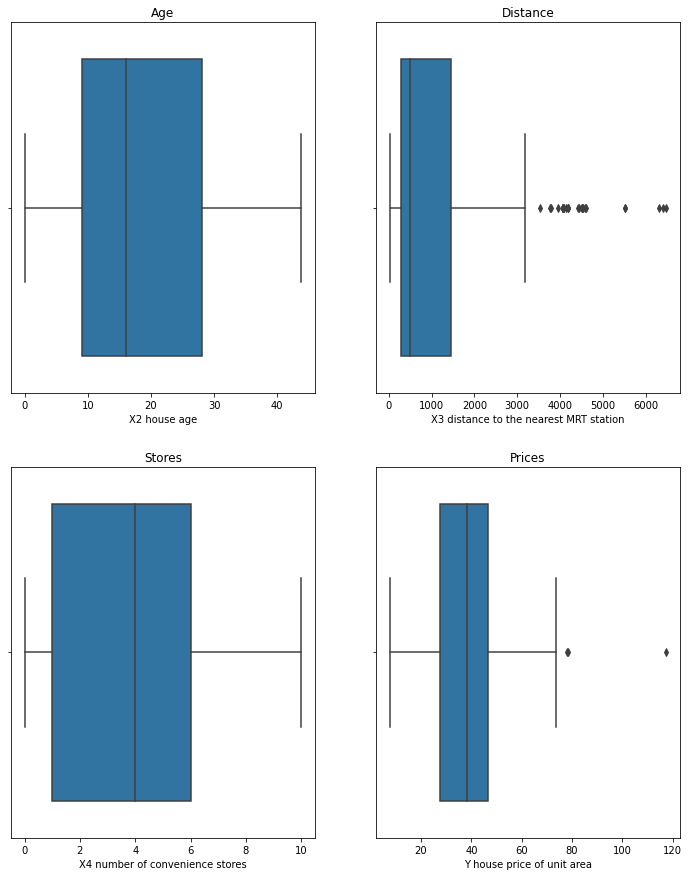

In [26]:
fig,axes=plt.subplots(2,2,figsize=(12,15))
sns.boxplot(data=df,x='X2 house age',ax=axes[0,0]).set(title='Age')
sns.boxplot(data=df,x='X3 distance to the nearest MRT station',ax=axes[0,1]).set(title='Distance')
sns.boxplot(data=df,x='X4 number of convenience stores',ax=axes[1,0]).set(title='Stores')
sns.boxplot(data=df,x='Y house price of unit area',ax=axes[1,1]).set(title='Prices')
#no outliers in age and stores

([<matplotlib.patches.Wedge at 0x7f2a2ddde190>,
 [Text(1.0988219459105995, 0.05089529629782886, 'age>40'),
  Text(0.8846524868156739, 0.6537506998626038, 'age>30'),
  Text(-0.43048755467174854, 1.012265017311543, 'age>20'),
  Text(-0.20561941672919873, -1.0806112415961369, 'age>10')],
 [Text(0.5993574250421451, 0.027761070707906645, '1.5%'),
  Text(0.4825377200812766, 0.35659129083414753, '17.3%'),
  Text(-0.23481139345731733, 0.5521445548972052, '25.2%'),
  Text(-0.11215604548865384, -0.5894243135978927, '56.0%')])

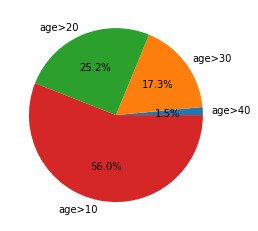

In [27]:
labels=['age>40','age>30','age>20','age>10']
ages=[8,94,137,304]

plt.pie(ages, labels=labels, autopct='%1.1f%%' )
#bestseller(modern houses)

# Regression Model

### *Multi linear regerssion*

In [85]:
from sklearn.model_selection import train_test_split


In [86]:
#set x and y
#df['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores'].values
x=df.drop(['Y house price of unit area', 'No'], axis = 1).values
y=df['Y house price of unit area'].values
x_label="3abotsha"
y_label="s"

In [87]:
#train the model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [88]:
#build a LR model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [89]:
#get values of bias and variance errors
avg_loss,avg_bias,avg_var=bias_variance_decomp(model,x_train,y_train,x_test,y_test,loss='mse',num_rounds=10,random_seed=43)
#display bias and variance errors
print(f'Average loss is:{round(avg_loss,4)}')
print(f'bias error is:{round(avg_bias,4)}')
print(f'avg_var is:{round(avg_var,4)}')

Average loss is:49.7385
bias error is:46.6653
avg_var is:3.0732


model is underfitting so we must solve this proplem by increase the complexity of the by model so we will use polynomial regression

### *Polynomial regression*

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
model2 = LinearRegression()
model2.fit(X_poly,y_train)
x_testp=poly_reg.fit_transform(x_test)
y_predp=model2.predict(x_testp)
#y_predp
 



In [48]:
# predicting the accuracy score

r_score = r2_score(y_test,y_predp)
MSE = mean_squared_error(y_test,y_predp)
RMSE = np.sqrt(mean_squared_error(y_test,y_predp))

print('‘r2 socre is = ',r_score)
print('‘mean_sqrd_error is =',MSE )
print('‘root_mean_squared error of is =',RMSE)

a_0 = model2.intercept_
a_1 = model2.coef_[0]
a_2 = model.coef_[1]
a_3=model.coef_[2]
a_4=model.coef_[3]
a_5=model.coef_[4]
a_6=model.coef_[5]

print('a_0 is = ',a_0)
print('a_1 is = ',a_1)
print('a_2 is =',a_2 )
print('a_3 is =',a_3 )
print('a_4 is =',a_4 )
print('a_5 is =',a_5 )

print(f"model equation is : Y={a_0}+{a_1}x+{a_2}x2+{a_3}x3+{a_4}x4+{a_5}x5")





‘r2 socre is =  -0.33639479178610454
‘mean_sqrd_error is = 202.84609086626247
‘root_mean_squared error of is = 14.242404672886614
a_0 is =  66937589.337892525
a_1 is =  -1214.7915099284949
a_2 is = -0.5110486131060289
a_3 is = -0.003994424364097249
a_4 is = 0.8750991060981884
a_5 is = 249.85357115003347
model equation is : Y=66937589.337892525+-1214.7915099284949x+-0.5110486131060289x2+-0.003994424364097249x3+0.8750991060981884x4+249.85357115003347x5


In [57]:
#get values of bias and variance errors
avg_loss,avg_bias,avg_var=bias_variance_decomp(model2,X_poly,y_train,x_testp,y_test,loss='mse',num_rounds=10,random_seed=43)
#display bias and variance errors
print(f'Average loss is:{round(avg_loss,4)}')
print(f'bias error is:{round(avg_bias,4)}')
print(f'avg_var is:{round(avg_var,4)}')

Average loss is:121.1476
bias error is:67.4555
avg_var is:53.6921


In [34]:
### results of poly_degree

#degree(2)

#Average loss is:121.1476
#bias error is:67.4555
#avg_var is:53.6921

#degree(3)

#Average loss is:39899.3125
#bias error is:8140.4538
#avg_var is:31758.8587


#degree(4)

#Average loss is:2653050.2148
#bias error is:157411.6952
#avg_var is:2495638.5196






degree 2 in poly_reg gives the least error